In [88]:
import pandas as pd
disease = pd.read_csv("framingham.csv")
disease.head()



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [89]:
disease.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [86]:
#split default into two categories
#loan['Default'] = loan['Default'].map({'No':0, 'Yes':1})

In [90]:
#drop education since there's no clear documentation on the column
disease.drop(['education'],axis=1,inplace=True)

In [93]:
#continuous features
#check whether glucose, BMI, Cigsperday, and totalChol are missing at random or not.
disease.groupby(disease['glucose'].isnull()).mean()
#since there isn't much difference between the two groups, we can assume that the missing values are missing at random.

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
glucose,,,,,,,,,,,,,,,
False,0.442597,49.643896,0.490649,8.978301,0.030008,0.006234,0.312727,0.027273,237.001302,132.449870,82.928831,25.810420,75.733437,81.966753,0.154286
True,0.296392,49.000000,0.528351,9.250000,0.025907,0.002577,0.288660,0.010309,233.635057,131.385309,82.542526,25.717755,77.322165,NaN,0.128866


In [94]:
#fill using the mean
disease['glucose'].fillna(disease['glucose'].mean(),inplace=True)

In [95]:
#next is BMI
disease.groupby(disease['BMI'].isnull()).mean()
#there's a difference between the two groups, so we can't assume that the missing values are missing at random.

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
BMI,,,,,,,,,,,,,,,
False,0.429960,49.575729,0.494667,9.017900,0.029525,0.005452,0.310263,0.025361,236.775540,132.334676,82.904006,25.802008,75.877904,81.93820,0.150273
True,0.263158,51.631579,0.368421,5.736842,0.052632,0.105263,0.368421,0.105263,224.222222,136.289474,80.552632,NaN,76.105263,88.30704,0.526316


In [96]:
#using (MICE) to fill the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
disease['BMI'] = imp.fit_transform(disease[['BMI']])
disease['BMI'].isnull().sum()

0

In [97]:
#next is Cigsperday
disease.groupby(disease['cigsPerDay'].isnull()).mean()
#there's a difference between the two groups, so we can't assume that the missing values are missing at random.

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
cigsPerDay,,,,,,,,,,,,,,,
False,0.428843,49.586600,0.490615,9.003089,0.029836,0.00594,0.311000,0.025897,236.671315,132.351152,82.887028,25.801686,75.865494,81.946361,0.152530
True,0.482759,49.344828,1.000000,NaN,0.000000,0.00000,0.241379,0.000000,243.931034,132.534483,83.827586,25.848621,77.827586,84.926449,0.068966


In [98]:
#using (MICE) to fill the missing values
imp2 = IterativeImputer(max_iter=10, random_state=0)
disease['cigsPerDay'] = imp2.fit_transform(disease[['cigsPerDay']])
disease['cigsPerDay'].isnull().sum()

0

In [99]:
#finally totalChol
disease.groupby(disease['totChol'].isnull()).mean()
#it's missing at random, so we can fill it using the mean

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
totChol,,,,,,,,,,,,,,,
False,0.432665,49.562321,0.492598,8.972323,0.029255,0.005969,0.310649,0.025788,236.721585,132.32235,82.891237,25.795768,75.85049,81.948527,0.151624
True,0.140000,51.480000,0.620000,11.580000,0.061224,0.000000,0.300000,0.020000,NaN,134.87000,83.080000,26.324640,78.26000,83.493403,0.180000


In [100]:
disease['totChol'].fillna(disease['totChol'].mean(),inplace=True)
disease['heartRate'].fillna(disease['heartRate'].mean(),inplace=True)

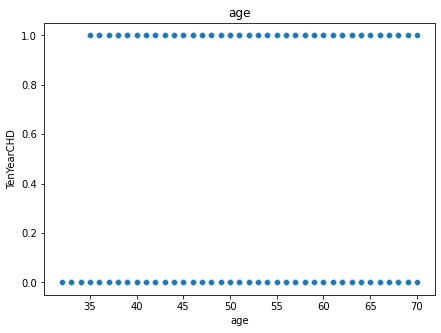

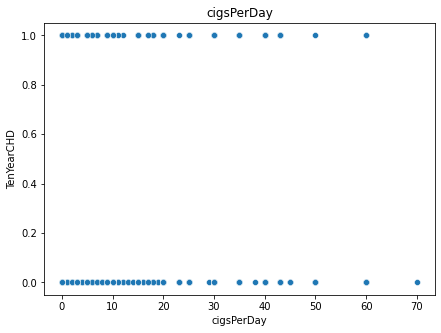

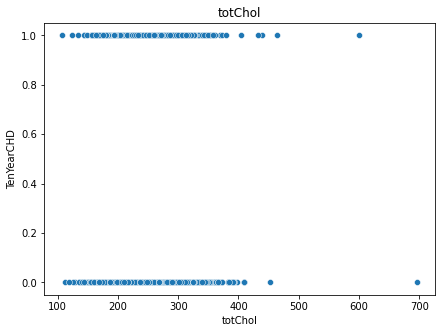

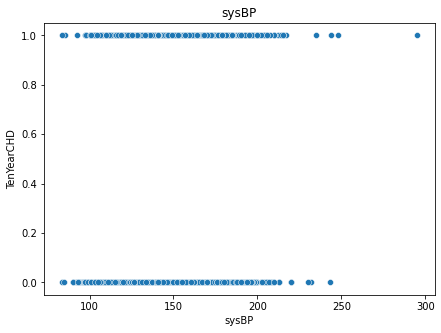

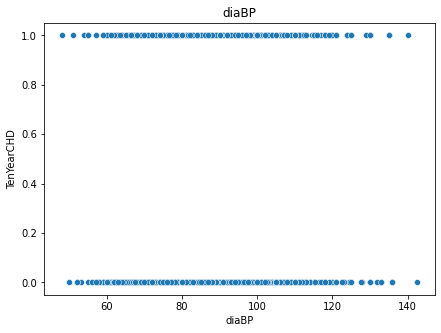

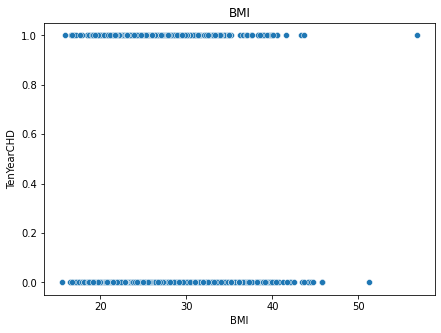

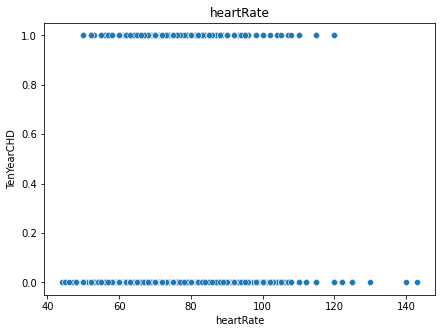

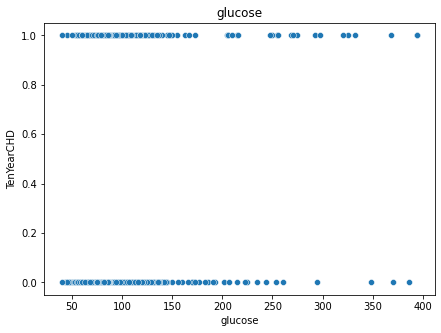

In [101]:
#plotting continuous features with respect to the target column
import seaborn as sns
import matplotlib.pyplot as plt
cont_features = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for i in cont_features:
    plt.figure(figsize=(7,5))
    plt.title(i)
    sns.scatterplot(data = disease, x = disease[i], y = disease['TenYearCHD'])
    plt.show()
#from the plots we can see that age, cigsPerDay, BMI, heartrate, and glucose are good indicators on whether the person has a heart disease or not.


In [102]:
#studying missin categorical features
disease.groupby(disease['BPMeds'].isnull()).mean()
#missing at random, so we can fill it using the mean
disease['BPMeds'].fillna(disease['BPMeds'].mean(),inplace=True)

<Figure size 432x288 with 0 Axes>

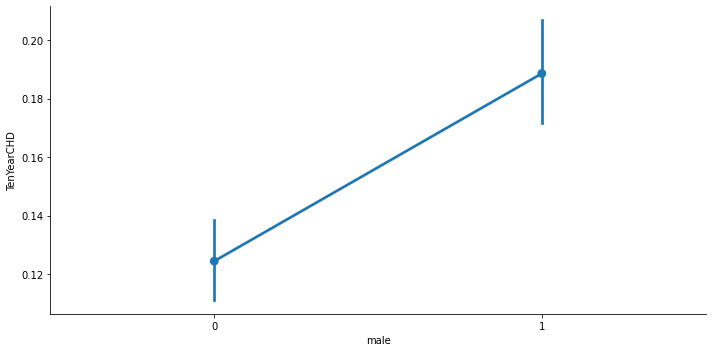

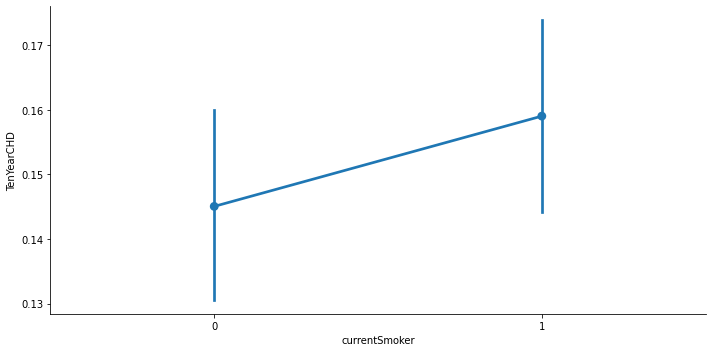

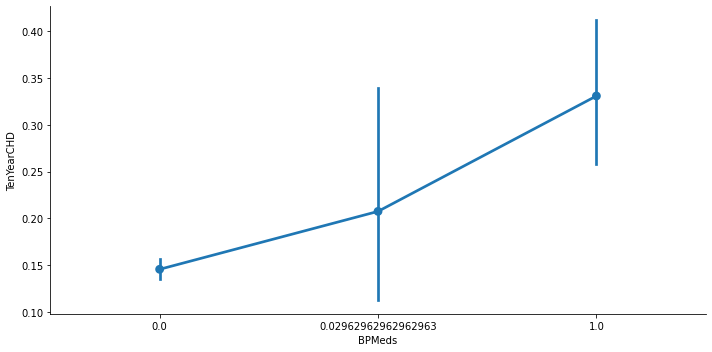

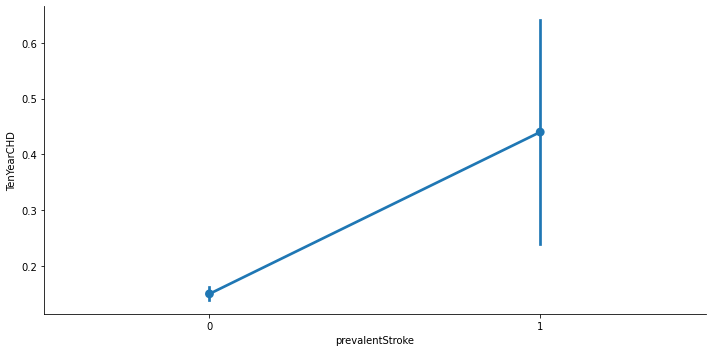

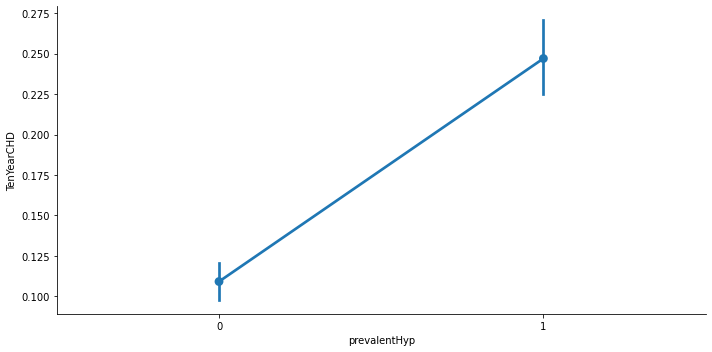

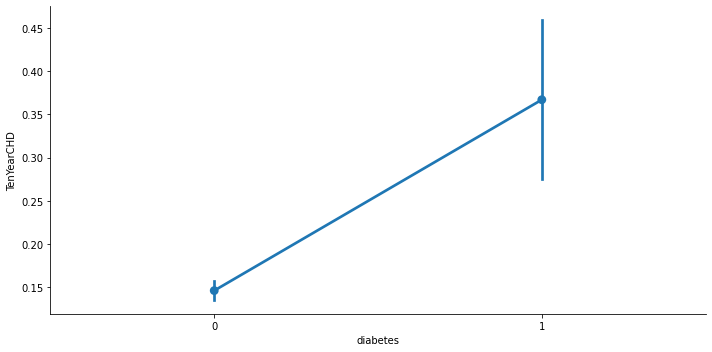

In [103]:
#plotting categorical features with respect to the target column
cat_features = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for i , col in enumerate(cat_features):
    plt.figure(i)
    show = sns.catplot(x = col, y = 'TenYearCHD', data = disease, kind = 'point', aspect = 2)
print(show)


In [104]:
disease.drop(['male', 'currentSmoker'], axis = 1, inplace = True)

In [108]:
label = disease['TenYearCHD']
feature = disease.drop(['TenYearCHD'], axis = 1)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [110]:
#building tree classifier
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier(random_state = 42)
ds.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [111]:
#test the model
import sklearn.metrics as metrics
y_pred = ds.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print(accuracy_score)


0.7405660377358491


In [117]:
#validate the model
y_pred_val = ds.predict(X_val)
accuracy_score_val = metrics.accuracy_score(y_val, y_pred_val)
print(accuracy_score_val)

0.7515723270440252


[Text(0.5068451031889932, 0.9814814814814815, 'age <= 48.5\ngini = 0.26\nsamples = 2966\nvalue = [2510, 456]\nclass = No'),
 Text(0.2339380624796847, 0.9444444444444444, 'glucose <= 220.5\ngini = 0.147\nsamples = 1456\nvalue = [1340, 116]\nclass = No'),
 Text(0.2313377049305217, 0.9074074074074074, 'sysBP <= 192.0\ngini = 0.142\nsamples = 1452\nvalue = [1340, 112]\nclass = No'),
 Text(0.16924131267268, 0.8703703703703703, 'cigsPerDay <= 9.502\ngini = 0.137\nsamples = 1444\nvalue = [1337, 107]\nclass = No'),
 Text(0.09480639525434748, 0.8333333333333334, 'diaBP <= 107.5\ngini = 0.091\nsamples = 770\nvalue = [733, 37]\nclass = No'),
 Text(0.06869616447261498, 0.7962962962962963, 'BMI <= 16.67\ngini = 0.085\nsamples = 761\nvalue = [727, 34]\nclass = No'),
 Text(0.05042255810173899, 0.7592592592592593, 'diaBP <= 89.25\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.04782220055257598, 0.7222222222222222, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.0530229

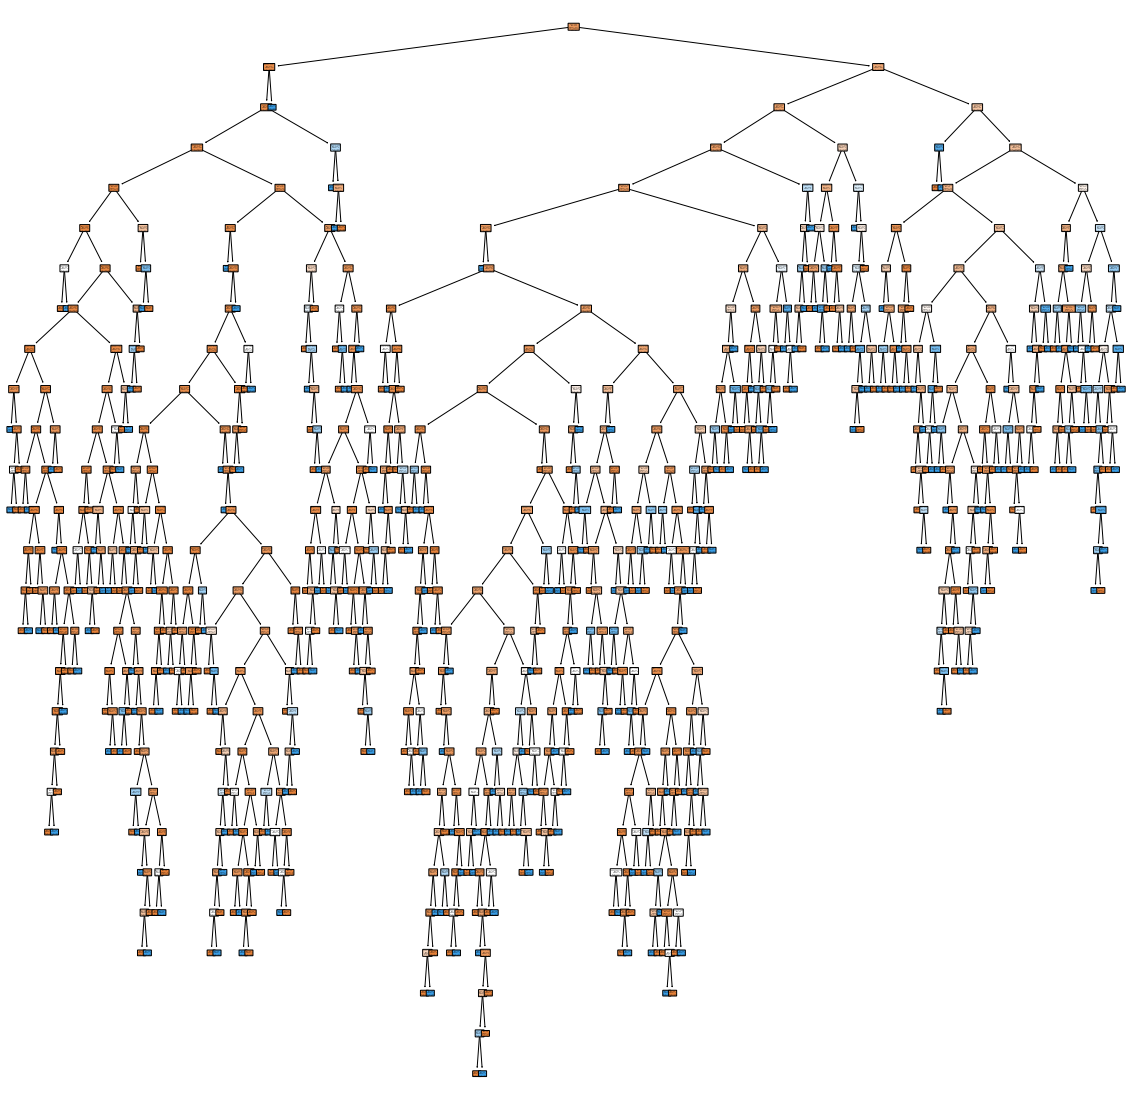

In [113]:
#visualizing the tree
from sklearn import tree
plt.figure(figsize = (20, 20))
tree.plot_tree(ds, 
               filled = True, feature_names = list(feature.columns), 
               class_names = ['No', 'Yes'], 
               rounded = True 
               )

Text(0, 0.5, 'Features')

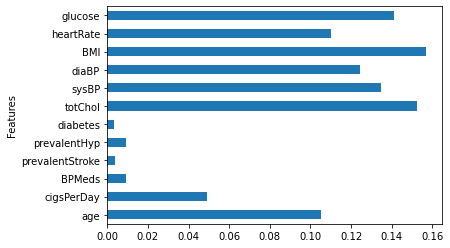

In [114]:
#plotting feature importance
importance = ds.feature_importances_
feature_importance = pd.Series(importance, index = feature.columns)
feature_importance.plot(kind = 'barh')
plt.ylabel('Features')

In [115]:
#pruning the tree
path = ds.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00021578, 0.00021966, 0.00022158, 0.00026366,
       0.00026473, 0.00026747, 0.00026972, 0.00028096, 0.00028096,
       0.00029501, 0.00029501, 0.00029501, 0.00029501, 0.00029969,
       0.00029969, 0.00029969, 0.00030069, 0.00030344, 0.00030784,
       0.00031122, 0.00031219, 0.00031363, 0.00031468, 0.00031505,
       0.00031732, 0.00031842, 0.00031842, 0.00031842, 0.0003211 ,
       0.0003211 , 0.00032359, 0.00032367, 0.00032553, 0.00032724,
       0.00032752, 0.00032779, 0.00032876, 0.00032938, 0.00032949,
       0.0003322 , 0.00033227, 0.00033247, 0.00033278, 0.00033328,
       0.00033715, 0.00033715, 0.00033715, 0.00033715, 0.00033715,
       0.00033715, 0.00033715, 0.00033715, 0.00033715, 0.00033715,
       0.00034046, 0.00035336, 0.00035963, 0.0003604 , 0.00036511,
       0.0003677 , 0.00037774, 0.00039807, 0.00040459, 0.00040459,
       0.0004134 , 0.00041761, 0.00043225, 0.00043592, 0.00044954,
       0.00044954, 0.00044954, 0.00044954, 0.00044954, 0.00044

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

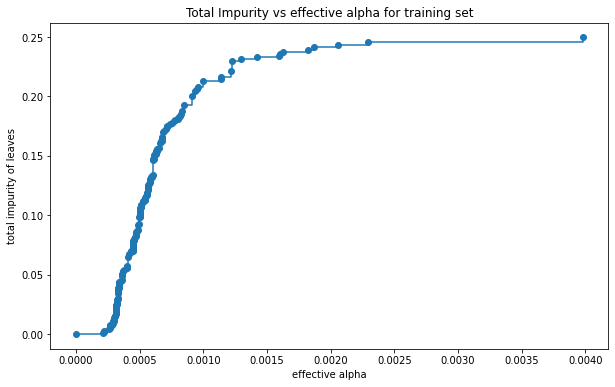

In [119]:
#plotting ccp_alphas
plt.figure(figsize = (10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')
plt.xlabel('effective alpha')
plt.ylabel('total impurity of leaves')
plt.title('Total Impurity vs effective alpha for training set')
#we see that the alpha value with the highest impurity is 0.01 and the lowest is 0.0001

In [120]:
#building a tree with clowest alpha value  
ds_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.0001)
ds_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, random_state=42)

In [121]:
#validating pruned tree
y_pred_val_pruned = ds_pruned.predict(X_val)
accuracy_score_val_pruned = metrics.accuracy_score(y_val, y_pred_val_pruned)
print(accuracy_score_val_pruned)

0.7515723270440252


In [122]:
#testing pruned tree
y_pred_pruned = ds_pruned.predict(X_test)
accuracy_score_pruned = metrics.accuracy_score(y_test, y_pred_pruned)
print(accuracy_score_pruned)

0.7405660377358491


In [123]:
#attempting pre-pruning
ds_prepruned = DecisionTreeClassifier(random_state = 42, max_depth = 3)
ds_prepruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [124]:
#validating pre-pruned tree
y_pred_val_prepruned = ds_prepruned.predict(X_val)
accuracy_score_val_prepruned = metrics.accuracy_score(y_val, y_pred_val_prepruned)
print(accuracy_score_val_prepruned)
#notice that the accuracy score is higher than the post-pruned tree

0.85062893081761


In [126]:
#testing pre-pruned tree
y_pred_prepruned = ds_prepruned.predict(X_test)
accuracy_score_prepruned = metrics.accuracy_score(y_test, y_pred_prepruned)
print(accuracy_score_prepruned)
#notice that the accuracy score is higher than the post-pruned tree

0.8411949685534591


[Text(0.4583333333333333, 0.875, 'age <= 48.5\ngini = 0.26\nsamples = 2966\nvalue = [2510, 456]\nclass = No'),
 Text(0.25, 0.625, 'glucose <= 220.5\ngini = 0.147\nsamples = 1456\nvalue = [1340, 116]\nclass = No'),
 Text(0.16666666666666666, 0.375, 'sysBP <= 192.0\ngini = 0.142\nsamples = 1452\nvalue = [1340, 112]\nclass = No'),
 Text(0.08333333333333333, 0.125, 'gini = 0.137\nsamples = 1444\nvalue = [1337, 107]\nclass = No'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]\nclass = Yes'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.6666666666666666, 0.625, 'sysBP <= 155.25\ngini = 0.349\nsamples = 1510\nvalue = [1170, 340]\nclass = No'),
 Text(0.5, 0.375, 'age <= 64.5\ngini = 0.31\nsamples = 1170\nvalue = [946, 224]\nclass = No'),
 Text(0.4166666666666667, 0.125, 'gini = 0.293\nsamples = 1095\nvalue = [900, 195]\nclass = No'),
 Text(0.5833333333333334, 0.125, 'gini = 0.474\nsamples = 75\nvalue = [46, 29]\nclass = No'),

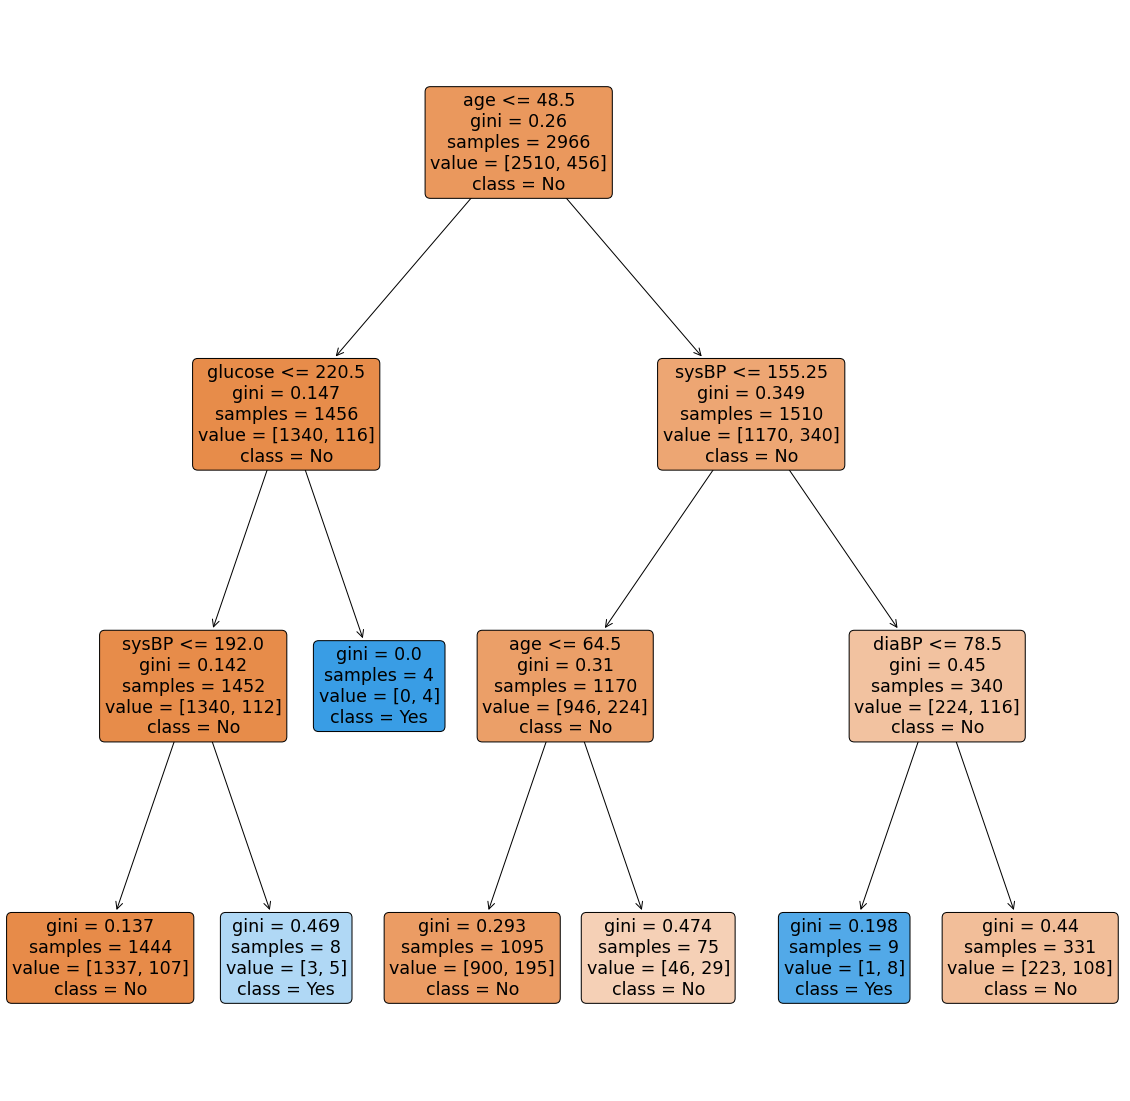

In [125]:
#plotting pre-pruned tree
plt.figure(figsize = (20, 20))
tree.plot_tree(ds_prepruned,
                filled = True, feature_names = list(feature.columns),
                class_names = ['No', 'Yes'],
                rounded = True
                )